In [1]:
import pandas as pd
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
df = pd.read_csv('desoft.csv', sep=';', encoding='latin-1')
dataset = df.copy()
dataset.tail()

,Año,Mes,Energia
103,2015,5,22886
104,2015,4,22165
105,2015,3,23516
106,2015,2,2690
107,2015,1,19424


In [3]:
dataset = df.copy() #PARA NO PERDER LOS VALORES ORIGINALES DEL SATA SET EN CASO DE Q HAYA UN CAMBIO

<Axes: xlabel='None', ylabel='Energia'>

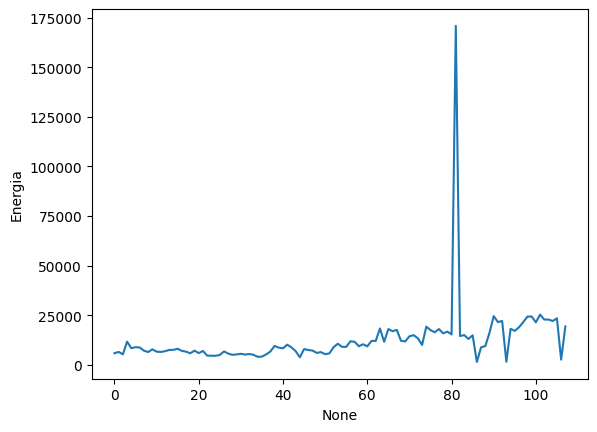

In [4]:
sns.lineplot(x= dataset.index , y= "Energia", data= dataset)

separando los datos de validacion y entrenamiento

In [5]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #Datos de entrada y etiquetas para entrenamiento.
test_dataset = dataset.drop(train_dataset.index) #Datos de entrada y etiquetas para prueba.

train_labels = train_dataset.pop('Energia') #Datos de entrada y etiquetas para entrenamiento.
test_labels = test_dataset.pop('Energia') #Datos de entrada y etiquetas para prueba.

ESTADISTICAS

In [6]:
train_labels_stats = train_labels.describe()

train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

print(train_stats)


     count         mean       std     min     25%     50%      75%     max
Año   86.0  2019.151163  2.636921  2015.0  2017.0  2019.0  2021.00  2023.0
Mes   86.0     6.662791  3.327640     1.0     4.0     7.0     9.75    12.0


normalizando

In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def norm_(x):
  return (x - train_labels_stats['mean']) / train_labels_stats['std']

normed_train_data_labels = norm_(train_labels)
normed_test_data_labels = norm_(test_labels)

MODELO

In [10]:
def build_model():
  model = keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, normed_train_data_labels,
  epochs=EPOCHS, validation_split = 0.2)


Epoch 1/1000
3/3 [==============================] - 2s 253ms/step - loss: 0.8255 - mae: 0.7590 - mse: 0.8255 - val_loss: 1.1484 - val_mae: 0.9402 - val_mse: 1.1484
Epoch 2/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.7264 - mae: 0.6941 - mse: 0.7264 - val_loss: 1.0715 - val_mae: 0.8935 - val_mse: 1.0715
Epoch 3/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6497 - mae: 0.6357 - mse: 0.6497 - val_loss: 1.0119 - val_mae: 0.8532 - val_mse: 1.0119
Epoch 4/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5917 - mae: 0.5861 - mse: 0.5917 - val_loss: 0.9429 - val_mae: 0.8049 - val_mse: 0.9429
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5394 - mae: 0.5461 - mse: 0.5394 - val_loss: 0.8724 - val_mae: 0.7541 - val_mse: 0.8724
Epoch 6/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.4927 - mae: 0.5075 - mse: 0.4927 - val_loss: 0.8103 - val_mae: 0.7058 - val_mse: 0.8103
Epoch 7/1000
3/3 [===

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.120145,0.203379,0.120145,0.500145,0.490824,0.500145,995
996,0.121218,0.202979,0.121218,0.504043,0.498198,0.504043,996
997,0.119644,0.192574,0.119644,0.507882,0.505513,0.507882,997
998,0.118857,0.192535,0.118857,0.510590,0.505962,0.510590,998
999,0.116602,0.195087,0.116602,0.513759,0.502761,0.513759,999


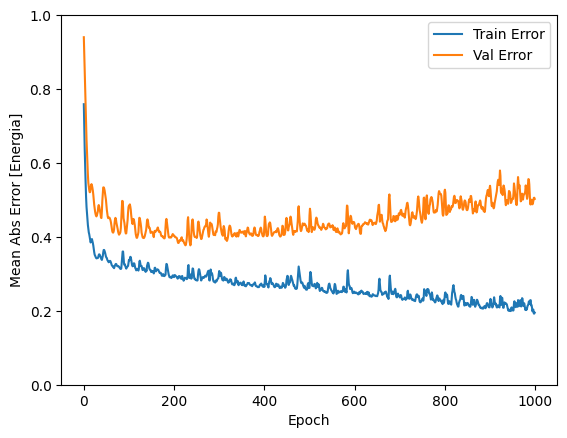

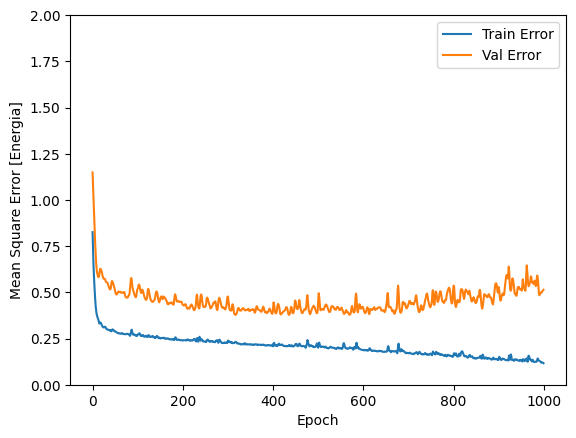

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_history(history):
  # ...
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Energia]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Energia]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,2])
  plt.legend()
  plt.show()

plot_history(history)

In [15]:
loss, mae, mse = model.evaluate(normed_test_data, normed_test_data_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Energy".format(mae))


1/1 - 0s - loss: 29.8797 - mae: 1.6170 - mse: 29.8797 - 24ms/epoch - 24ms/step
Testing set Mean Abs Error:  1.62 Energy


1/1 [==============================] - 0s 153ms/step


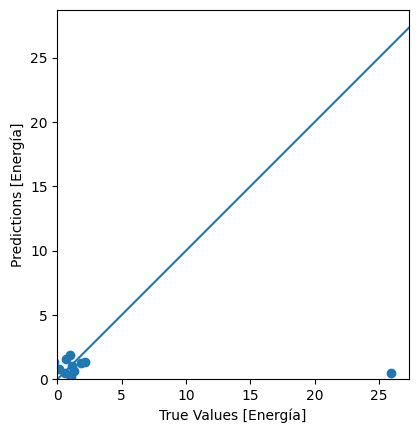

In [16]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(normed_test_data_labels, test_predictions)
plt.xlabel('True Values [Energía]')
plt.ylabel('Predictions [Energía]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-150, 150], [-150, 150])

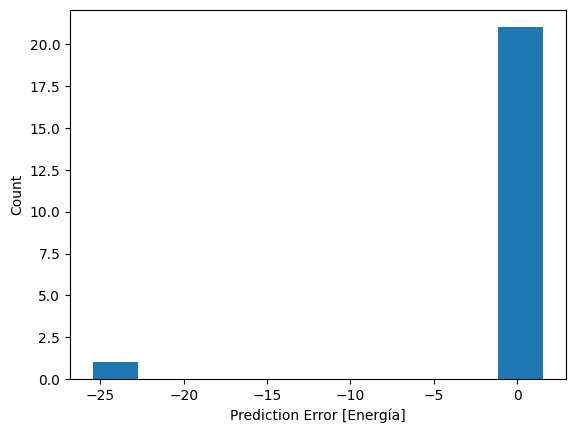

In [17]:
error = test_predictions - normed_test_data_labels
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Energía]")
_ = plt.ylabel("Count")